In [79]:
%matplotlib inline 
#有了matplotlib inline 就可以省掉plt.show()了
%load_ext autoreload
%autoreload 2

from __future__ import division
from imports import *
#import pylab #使用pylab模式，可以直接使用numpy、pandas和绘图，而不需要再次引入,会配置为使用你所指定的matplotlib gui后端，还会提供一种更接近于matlab的界面
#%pylab
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle code</button>""", raw=True)
# 允许多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Toggle code

# 二分类问题

In [9]:
filename = './sonar-data.csv'
names = np.arange(61)
data = pd.read_csv(filename,names=names)

In [13]:
# 分析数据
data.shape
#data.dtypes
data.head(10)
data.describe()
data.groupby(60).size()

(208, 61)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


60
M    111
R     97
dtype: int64

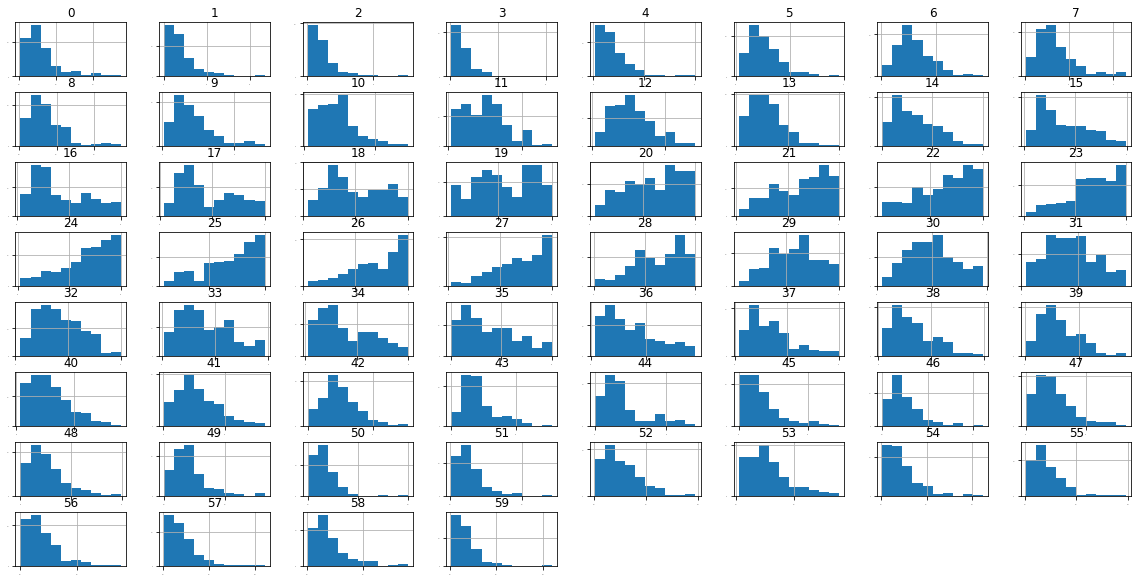

In [19]:
# 可视化
from IPython.core.pylabtools import figsize
figsize(20,10)
data.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1);

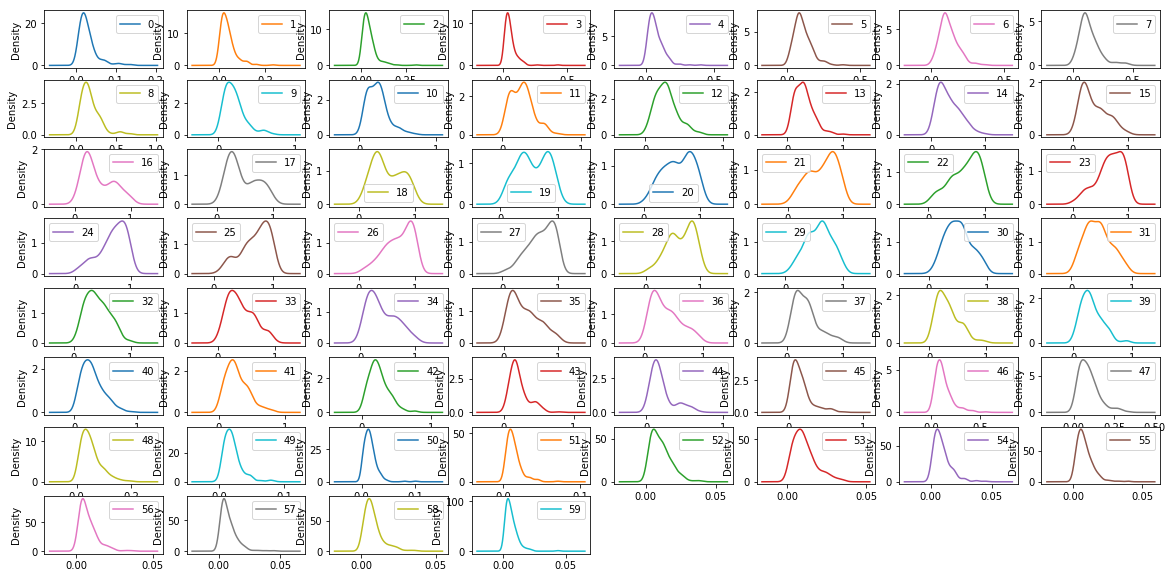

In [21]:
data.plot(kind='kde',layout=(8,8),subplots=True,sharex=False);
# 呈现偏态分布，可以通过Box-Cox转换提高模型的准确度

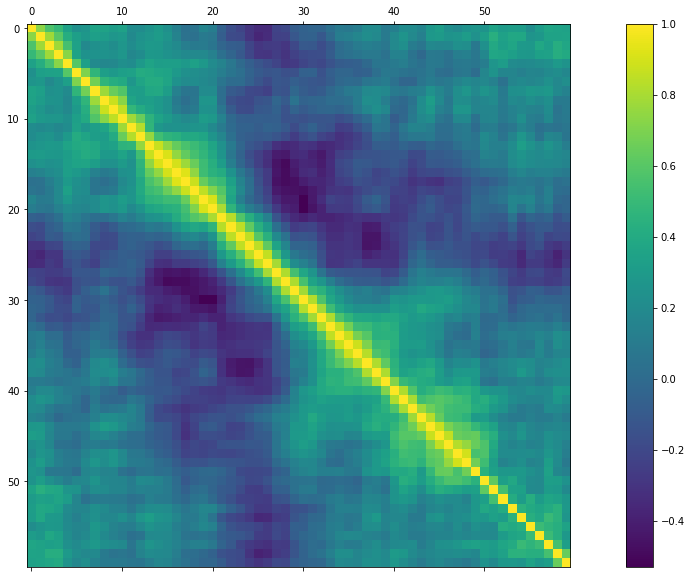

In [23]:
# 关系矩阵图
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr());
fig.colorbar(cax)

In [29]:
# 分离评估数据集
array = data.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.2
seed = 7
X_train,X_validation,Y_train,Y_validation = train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [30]:
# 采用十折交叉验证来分离数据，通过准确度的平均值和标准差来比较算法
num_folds = 10
seed = 7
scoring = 'accuracy'

# 算法
models = {}
# 逻辑回归
models['LR'] = LogisticRegression()
# 线性判别分析
models['LDA'] = LinearDiscriminantAnalysis()
# K近邻
models['KNN'] = KNeighborsClassifier()
# 分类与回归树
models['CART'] = DecisionTreeClassifier()
# 贝叶斯分类器
models['NB'] = GaussianNB()
# 支持向量机
models['SVM'] = SVC()

results = []
for key in models:
    kfold = KFold(n_splits=num_folds,random_state=seed)
    cv_results = cross_val_score(models[key],X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    print('%s: %f (%f)'% (key,cv_results.mean(),cv_results.std()))


KNN: 0.808088 (0.067507)
LDA: 0.746324 (0.117854)
SVM: 0.608824 (0.118656)
NB: 0.648897 (0.141868)
CART: 0.741176 (0.060056)
LR: 0.782721 (0.093796)


{'boxes': [<matplotlib.lines.Line2D at 0x2fa6afd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2fa74630>,
 'fliers': [<matplotlib.lines.Line2D at 0x2fa74e10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2fa74b70>,
 'whiskers': [<matplotlib.lines.Line2D at 0x2fa6af90>,
  <matplotlib.lines.Line2D at 0x2f99cf30>]}

[Text(0,0,'KNN'),
 Text(0,0,'LDA'),
 Text(0,0,'SVM'),
 Text(0,0,'NB'),
 Text(0,0,'CART'),
 Text(0,0,'LR')]

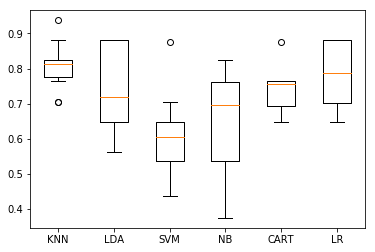

In [31]:
# 通过箱线图显示数据的分布情况
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())

In [36]:
# 可能由于数据分布的不均导致算法不够准确
# 于是将数据进行正态化处理
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler',StandardScaler()),('LR',LogisticRegression())])
pipelines['ScalerLDA'] = Pipeline([('Scaler',StandardScaler()),('LDA',LinearDiscriminantAnalysis())])
pipelines['ScalerKNN'] = Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])
pipelines['ScalerCART'] = Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeClassifier())])
#pipelines['ScalerNB'] = Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB)])
pipelines['ScalerSVM'] = Pipeline([('Scaler',StandardScaler()),('SVM',SVC())])

results = []
for key in pipelines:
    kfold = KFold(n_splits=num_folds,random_state=seed)
    cv_results = cross_val_score(pipelines[key],X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    print('%s: %f (%f)'%(key,cv_results.mean(),cv_results.std()))

ScalerLDA: 0.746324 (0.117854)
ScalerCART: 0.735294 (0.119165)
ScalerKNN: 0.825735 (0.054511)
ScalerLR: 0.734191 (0.095885)
ScalerSVM: 0.836397 (0.088697)


[Text(0,0,'ScalerLDA'),
 Text(0,0,'ScalerCART'),
 Text(0,0,'ScalerKNN'),
 Text(0,0,'ScalerLR'),
 Text(0,0,'ScalerSVM')]

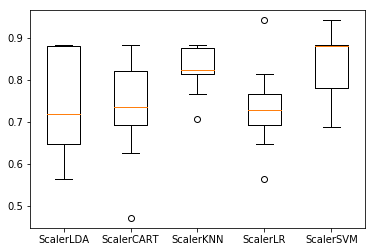

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
axe = ax.boxplot(results)
ax.set_xticklabels(pipelines.keys())

In [38]:
# 通过算法评估，我们发现KNN和SVM值得进一步优化
# KNN默认的n_neighbors数是5
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21]}
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds,random_state=seed)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result = grid.fit(X=rescaledX,y=Y_train)
print('最优：%s使用%s'%(grid_result.best_score_,grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],grid_result.cv_results_['std_test_score'],grid_result.cv_results_['params'])
for mean,std,param in cv_results:
    print('%f (%f) with %r'%(mean,std,param))

最优：0.849397590361使用{'n_neighbors': 1}
0.849398 (0.059881) with {'n_neighbors': 1}
0.837349 (0.066303) with {'n_neighbors': 3}
0.837349 (0.037500) with {'n_neighbors': 5}
0.765060 (0.089510) with {'n_neighbors': 7}
0.753012 (0.086979) with {'n_neighbors': 9}
0.734940 (0.104890) with {'n_neighbors': 11}
0.734940 (0.105836) with {'n_neighbors': 13}
0.728916 (0.075873) with {'n_neighbors': 15}
0.710843 (0.078716) with {'n_neighbors': 17}
0.722892 (0.084555) with {'n_neighbors': 19}
0.710843 (0.108829) with {'n_neighbors': 21}


In [76]:
# 支持向量机有两个重要的参数，C（惩罚系数）和kernel（径向基函数），默认的C参数是1.0，kernel参数是rbf
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train).astype(float)
param_grid = {}
param_grid['C'] = [0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0]
param_grid['kernel'] = ['linear','poly','rbf','sigmoid','precomputed']
model = SVC()
kfold = KFold(n_splits=num_folds,random_state = seed)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result = grid.fit(X=rescaledX,y=Y_train)

#print('最优：%s 使用%s'%(grid_result.best_score_,grid_result.best_params_))
#cv_results = zip(grid_result.cv_results_['mean_test_score'],grid_result.cv_results_['std_test_score'],grid_result.cv_results_['params'])

#for mean,std,param in cv_results:
#    print('%f (%f) with %r'%(mean,std,param))

ValueError: X should be a square kernel matrix

In [81]:
# 集成算法
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler',StandardScaler()),('AB',AdaBoostClassifier())])
ensembles['ScaledGBM'] = Pipeline([('Scaler',StandardScaler()),('GBM',GradientBoostingClassifier())])
ensembles['ScaledRF'] = Pipeline([('Scaler',StandardScaler()),('RFR',RandomForestClassifier())])
ensembles['ScaledET'] = Pipeline([('Scaler',StandardScaler()),('ETR',ExtraTreesClassifier())])
results = []
for key in ensembles:
    kfold = KFold(n_splits=num_folds,random_state=seed)
    cv_result = cross_val_score(ensembles[key],X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)'% (key,cv_result.mean(),cv_result.std()))

ScaledET: 0.812500 (0.086939)
ScaledAB: 0.813971 (0.066017)
ScaledRF: 0.783456 (0.095835)
ScaledGBM: 0.848162 (0.106352)


{'boxes': [<matplotlib.lines.Line2D at 0x30541610>,
 'caps': [<matplotlib.lines.Line2D at 0x30541cb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x3052b4b0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x30541f70>,
 'whiskers': [<matplotlib.lines.Line2D at 0x305415d0>,
  <matplotlib.lines.Line2D at 0x30538f30>]}

[Text(0,0,'ScaledET'),
 Text(0,0,'ScaledAB'),
 Text(0,0,'ScaledRF'),
 Text(0,0,'ScaledGBM')]

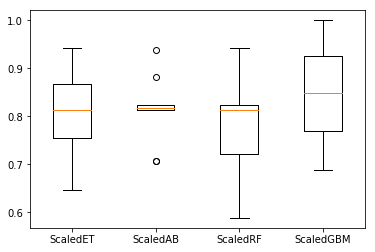

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(ensembles.keys())

In [83]:
# GBM 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators':[10,60,100,200,300,400,500,600,700,800,900]}
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds,random_state=seed)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result = grid.fit(X=rescaledX,y=Y_train)
print('最优： %s 使用%s'%(grid_result.best_score_,grid_result.best_params_))

最优： 0.867469879518 使用{'n_estimators': 800}


In [84]:
# 模型最终化
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier(n_estimators=800)
model.fit(X=rescaledX,y=Y_train)

# 评估模型
rescaled_validationX = scaler.transform(X_validation)
predictions = model.predict(rescaled_validationX)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=800,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

0.904761904762
[[25  2]
 [ 2 13]]
             precision    recall  f1-score   support

          M       0.93      0.93      0.93        27
          R       0.87      0.87      0.87        15

avg / total       0.90      0.90      0.90        42

